<a href="https://colab.research.google.com/github/nilarghadevkaran89-commits/projects/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## load the data

df=pd.read_csv("/content/netflix_titles.csv.zip")
print(df)

In [32]:
## information of data
print(df.head())

  show_id     type                          title         director  \
0      s1    Movie           Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show                  Blood & Water              NaN   
4      s5  TV Show                   Kota Factory              NaN   
7      s8    Movie                        Sankofa     Haile Gerima   
8      s9  TV Show  The Great British Baking Show  Andy Devonshire   

                                                cast  \
0                                                NaN   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
7  Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
4             

In [33]:
## checking the name of the colums for information
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [14]:
## checking the total number of null values
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [35]:
## clean data
# Drop rows with any missing values in the specified columns to clean the dataset
df=df.dropna(subset=['type','release_year','rating','country','duration'])
print(df)

     show_id     type                          title         director  \
0         s1    Movie           Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show                  Blood & Water              NaN   
4         s5  TV Show                   Kota Factory              NaN   
7         s8    Movie                        Sankofa     Haile Gerima   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
...      ...      ...                            ...              ...   
8801   s8802    Movie                        Zinzana  Majid Al Ansari   
8802   s8803    Movie                         Zodiac    David Fincher   
8804   s8805    Movie                     Zombieland  Ruben Fleischer   
8805   s8806    Movie                           Zoom     Peter Hewitt   
8806   s8807    Movie                         Zubaan      Mozez Singh   

                                                   cast  \
0                                                   NaN   
1    

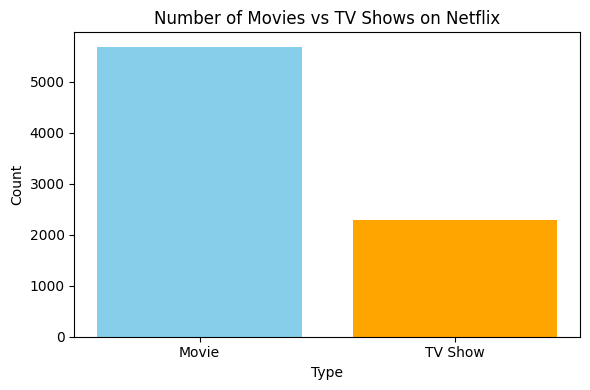

In [34]:
# Start of the plotting section for movie and TV show distribution

# Calculate the counts of each unique value in the 'type' column (Movie or TV Show)
type_counts = df['type'].value_counts()

# Create a new figure for the plot with a specified size (width=6 inches, height=4 inches)
plt.figure(figsize=(6, 4))

# Create a bar chart using the type counts
# type_counts.index provides the labels (e.g., 'Movie', 'TV Show') for the x-axis
# type_counts.values provides the numerical counts for the bars
# color parameter sets the colors for the bars
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])

# Set the title of the plot
plt.title('Number of Movies vs TV Shows on Netflix')
# Set the label for the x-axis
plt.xlabel('Type')
# Set the label for the y-axis
plt.ylabel('Count')
# Adjust plot parameters for a tight layout, preventing labels from overlapping
plt.tight_layout()
# Save the generated plot to a file named 'movies vs tvshow.png'
plt.savefig('movies vs tvshow.png')
# Display the plot
plt.show()

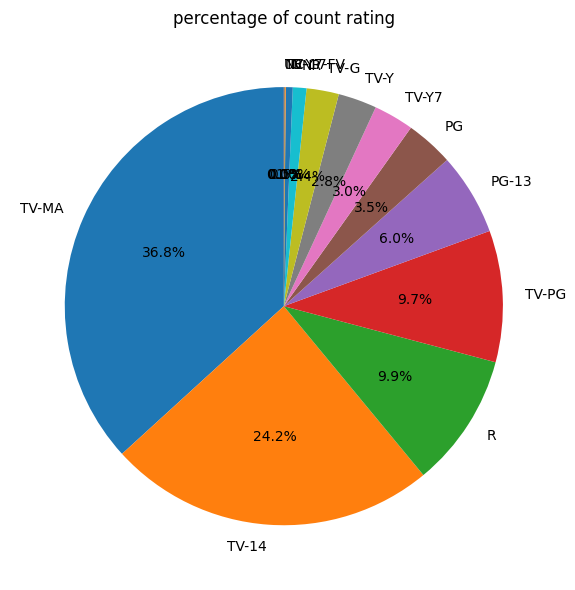

In [36]:
## percentage of contant
# Calculate the counts of each unique value in the 'rating' column
rating_counts=df['rating'].value_counts()
# Create a new figure for the pie chart with a specified size
plt.figure(figsize=(8,6))
# Create a pie chart showing the percentage distribution of content ratings
# 'rating_counts.values' provides the sizes for each wedge
# 'labels=rating_counts.index' provides the labels for each wedge
# 'autopct="%1.1f%%"' formats the percentage display on the wedges
# 'startangle=90' rotates the start of the first wedge to 90 degrees
plt.pie(rating_counts.values, labels=rating_counts.index, autopct="%1.1f%%",startangle=90)
plt.title('percentage of count rating')
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

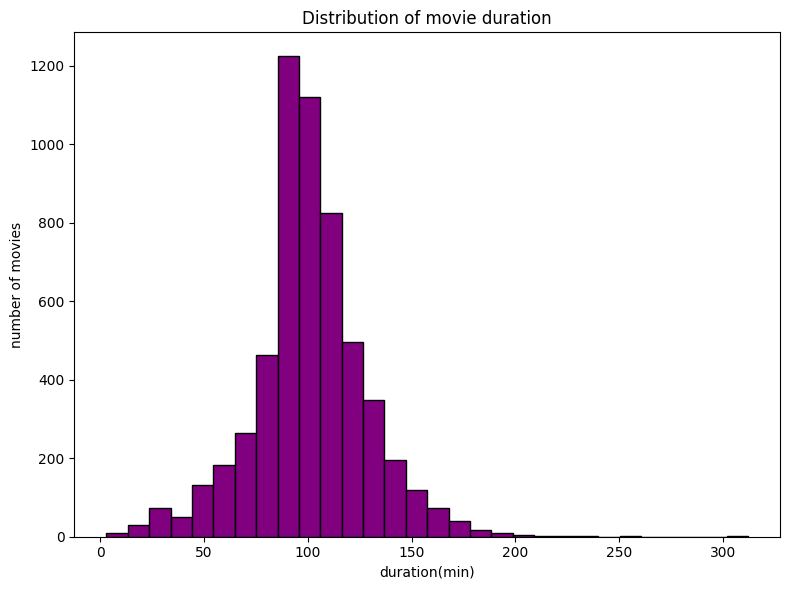

In [37]:
## filtering movies
# Filter the DataFrame to include only rows where 'type' is 'Movie' and create a copy
movie_df=df[df['type']=='Movie'].copy()
# Extract the numerical duration from the 'duration' column by removing 'min' and converting to integer
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
# Create a histogram of movie durations
# 'bins=30' sets the number of bins for the histogram
# 'color='purple'' sets the fill color of the bars
# 'edgecolor='black'' sets the color of the bar edges
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of movie duration')
plt.xlabel('duration(min)')
plt.ylabel('number of movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

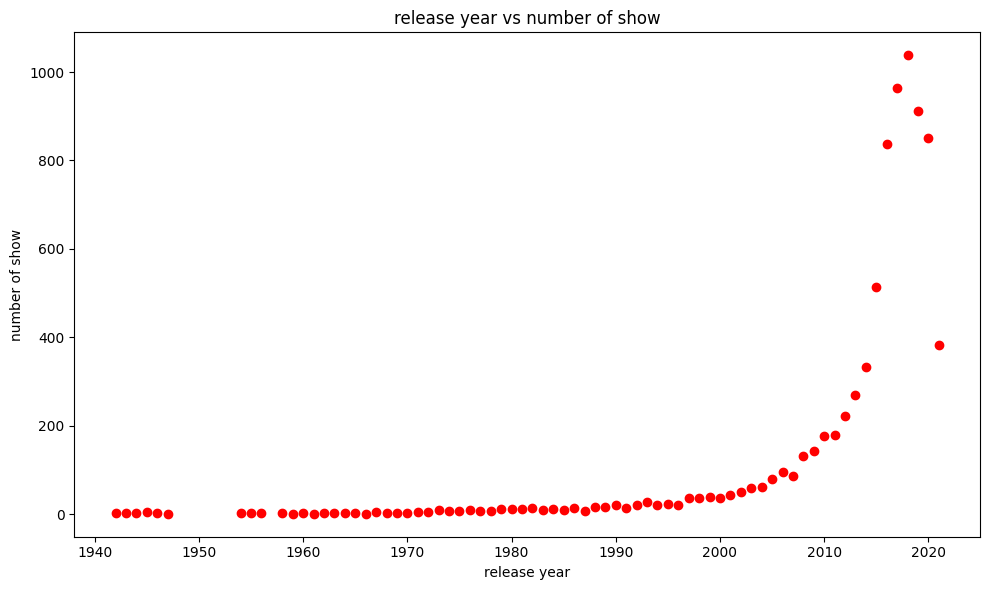

In [38]:
## visualisation of release year vs no of shows
# Calculate the counts of each unique release year and sort them by year
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
# Create a scatter plot showing release year versus the number of shows/movies released in that year
# 'release_counts.index' = x axis
# 'release_counts.values' = y axis
plt.scatter(release_counts.index,release_counts.values,color="red")
plt.title('release year vs number of show')
plt.xlabel('release year')
plt.ylabel('number of show')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show()